In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import matplotlib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
#To print mulitple statements in single command 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

***Import and Visualize Data***

In [ ]:
df_web = pd.read_csv('/content/reviews_credit_card_data.csv')
df_web.info()
df_web.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074 entries, 0 to 3073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bank_name        3074 non-null   object
 1   bank_name_short  3074 non-null   object
 2   card_category    3074 non-null   object
 3   reviews          3074 non-null   object
dtypes: object(4)
memory usage: 96.2+ KB


(3074, 4)

In [ ]:
df_tweet = pd.read_csv('/content/twitterfiles.csv')
df_tweet.info()
df_tweet.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196 entries, 0 to 3195
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ttext          3195 non-null   object 
 1   date           3195 non-null   object 
 2   isretweet      3195 non-null   object 
 3   retweetcount   3195 non-null   float64
 4   favoritecount  3195 non-null   float64
 5   score          3195 non-null   float64
 6   product        3195 non-null   object 
 7   region         3195 non-null   object 
 8   country        3195 non-null   object 
 9   duplicate      3195 non-null   object 
dtypes: float64(3), object(7)
memory usage: 249.8+ KB


(3196, 10)

In [ ]:
df_tweet.head()

,ttext,date,isretweet,retweetcount,favoritecount,score,product,region,country,duplicate
0,OnePlus 9RT in stock,19-01-2022 02:04,False,0.0,0.0,0.0,SBI,Delhi,India,False
1,@AxisBankSupport i haven't applied for Flipkar...,19-01-2022 02:44,False,0.0,0.0,0.0,Axis,Delhi,India,False
2,@HDFC_Bank My loan application and credit card...,19-01-2022 03:34,False,0.0,0.0,0.0,hdfc,Delhi,India,False
3,"Hey @AxisBank , i didn't received my credit ca...",19-01-2022 03:53,False,0.0,1.0,-1.0,Axis,Delhi,India,False
4,@TechnoFino \r\nBro I find a term in my hdfc m...,19-01-2022 04:03,False,0.0,0.0,0.0,hdfc,Delhi,India,False


In [ ]:
frames = [df_web['reviews'], df_tweet['ttext']]
frame = pd.concat(frames, ignore_index=True)
data = frame.to_frame()
data = data.rename(columns={0:"comment"})

In [ ]:
#type(data)
data

,comment
0,"On my first stay with the Trident Group, I was..."
1,From shopping at the supermarkets to watching ...
2,Have been using this card for over 2 years now...
3,This card is indeed the one that offers the mo...
4,The Valueback deals on fuels are the perfect b...
...,...
6265,@SBICard_Connect I have to surrender my sbi cr...
6266,@SBICard_Connect 3. SBI Credit Card PULSE\r\n\...
6267,@SBICard_Connect 3. SBI Credit Card PULSE \r\n...
6268,@mehulmpt I use SBI credit card for all intern...


In [ ]:
data.head()

,comment
0,"On my first stay with the Trident Group, I was..."
1,From shopping at the supermarkets to watching ...
2,Have been using this card for over 2 years now...
3,This card is indeed the one that offers the mo...
4,The Valueback deals on fuels are the perfect b...


***Text Preprocessing***

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Spell correct using text blob for the first 1000 records
from textblob import TextBlob
dfs = data['comment'][:5].apply(lambda x: str(TextBlob(x).correct()))

In [ ]:
dfs

0    In my first stay with the Evident Group, I was...
1    From shopping at the supermarket to watching m...
2    Have been using this card for over 2 years now...
3    His card is indeed the one that offers the mos...
4    The Valueback deals on feels are the perfect b...
Name: comment, dtype: object

In [ ]:
corpus = [] # form an empty list called corpus
ps = PorterStemmer() # for stemming the words to original form, for example - "running to run"
stop_words = set(stopwords.words('english')) # remove words such as will, I, and, at etc.
for i in range(0, 5144): # iterate through the list of all 5144 comments
  # remove handles (@), numbers, urls, emojis and any other special characters to have only text
  data_clean = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|[0-9]", '',str(data.comment[i]))
  # convert all words to lower case
  data_clean = data_clean.lower()
  # split sentences into words
  data_clean = data_clean.split()
  # remove English stop words
  data_clean = [x for x in data_clean if not x in stop_words]
  # stem words to the base form
  data_clean = [ps.stem(x) for x in data_clean]
  # join words to form the original sentences
  data_clean = " ".join(data_clean)
  # append to the list to get all Comments in one place
  corpus.append(data_clean)
#print(corpus)

In [ ]:
def comment_to_words(comment):
    letters_only = re.sub("[^a-zA-Z]", " ",Comments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

# TF-IDF Vectorizor

In [ ]:
data['comments'] = data['comment'].apply(lambda x : ' '.join([w for w in str(x).split() if len(w)>3]))

In [ ]:
tokenized_comments = data['comment'].apply(lambda x: str(x).split()) # tokenizing

In [ ]:
tokenized_comments.head()

0    [On, my, first, stay, with, the, Trident, Grou...
1    [From, shopping, at, the, supermarkets, to, wa...
2    [Have, been, using, this, card, for, over, 2, ...
3    [This, card, is, indeed, the, one, that, offer...
4    [The, Valueback, deals, on, fuels, are, the, p...
Name: comment, dtype: object

In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [ ]:
tokenized_comments = tokenized_comments.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming

In [ ]:
for i in range(len(tokenized_comments)):
    tokenized_comments[i] = ' '.join(tokenized_comments[i])
    
data['comment'] = tokenized_comments

In [ ]:
#Transform the data
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['comment'])
print(X)

  (0, 3438)	0.23271675658148455
  (0, 1107)	0.3099142968969758
  (0, 88)	0.42650516491733187
  (0, 3852)	0.11622557933222546
  (0, 4718)	0.1962937693600484
  (0, 2201)	0.45711374767985713
  (0, 4518)	0.44490875274302205
  (0, 4265)	0.45711374767985713
  (1, 3854)	0.3830134023774321
  (1, 1195)	0.08842338746014443
  (1, 3989)	0.15726659814941052
  (1, 4225)	0.2561842701140346
  (1, 3052)	0.4184352922668099
  (1, 4738)	0.5222940433909602
  (1, 4338)	0.5054610457012843
  (1, 4104)	0.227483724042981
  (2, 2170)	0.445270613397043
  (2, 1019)	0.4683900405810004
  (2, 4858)	0.5203097226015805
  (2, 4437)	0.28460483610369663
  (2, 4628)	0.37018071627466753
  (2, 1195)	0.16143981687843248
  (2, 3852)	0.2598579484773105
  (3, 2345)	0.5327158062483887
  (3, 3978)	0.29447473572139105
  :	:
  (6266, 3997)	0.48340013187432734
  (6266, 2627)	0.3398555457683455
  (6266, 1494)	0.12392702027048266
  (6266, 1195)	0.0974918370488218
  (6266, 3989)	0.1733954104270846
  (6267, 2797)	0.5381152980890325
  (62

#Build the clusters

In [ ]:
#Build the clusters
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [ ]:
#Profile the clusters
print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

Top terms per cluster:
Cluster 0:


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(None,)

 hdfc_bank


(None,)

 hdfcbank_car


(None,)

 hdfc


(None,)

 credit


(None,)

 card


(None,)

 bank


(None,)

 appli


(None,)

 pleas


(None,)

 custom


(None,)

 team


(None,)

<function print>

Cluster 1:


(None,)

 credit


(None,)

 card


(None,)

 bank


(None,)

 sbicard_connect


(None,)

 sbi


(None,)

 axi


(None,)

 icici


(None,)

 use


(None,)

 wa


(None,)

 flipkart


(None,)

<function print>

Cluster 2:


(None,)

 reward


(None,)

 thi


(None,)

 card


(None,)

 point


(None,)

 sbi


(None,)

 inr


(None,)

 shop


(None,)

 fuel


(None,)

 spend


(None,)

 rewards


(None,)

<function print>

# Bag of Words

In [ ]:
bagofwords=[]
for i in range (0,5144):
    words = corpus[i].split()
    bagofwords.append(words)

In [ ]:
bagofwords[5143]

['connect',
 'stop',
 'loot',
 'peopl',
 'genuin',
 'pathet',
 'experi',
 'one',
 'get',
 'trap']

In [ ]:
import itertools
import collections
all_words=list(itertools.chain(*bagofwords))
print(all_words[0:9546])
print()
print('Most commonly occuring words and frequency\n')
words_freq=collections.Counter(all_words)
words_freq.most_common(20)

['first', 'stay', 'trident', 'group', 'reward', 'bonu', 'point', 'shop', 'supermarket', 'watch', 'movi', 'spend', 'sbi', 'card', 'reward', 'use', 'card', 'year', 'benefit', 'reward', 'good', 'card', 'inde', 'one', 'offer', 'reward', 'fuel', 'save', 'benefit', 'card', 'holder', 'valueback', 'deal', 'fuel', 'perfect', 'benefit', 'card', 'util', 'reward', 'accru', 'sbi', 'card', 'util', 'bill', 'payment', 'groceri', 'shop', 'reward', 'everi', 'inr', 'spent', 'get', 'reward', 'point', 'made', 'use', 'reward', 'point', 'air', 'mile', 'shop', 'citi', 'bank', 'partner', 'tini', 'reward', 'redempt', 'fee', 'reward', 'good', 'got', 'reward', 'worth', 'sbi', 'exceed', 'spend', 'lac', 'like', 'amaz', 'reward', 'card', 'sbi', 'credit', 'card', 'get', 'membership', 'reward', 'point', 'everi', 'inr', 'spend', 'sinc', 'year', 'use', 'citi', 'bank', 'reward', 'credit', 'card', 'life', 'time', 'free', 'card', 'given', 'credit', 'limit', 'rs', 'use', 'card', 'shop', 'purpos', 'get', 'credit', 'card', 's

[('card', 4790),
 ('credit', 2689),
 ('reward', 2458),
 ('bank', 1407),
 ('sbi', 1210),
 ('get', 1093),
 ('point', 1052),
 ('use', 1023),
 ('shop', 741),
 ('fuel', 582),
 ('got', 563),
 ('care', 529),
 ('offer', 519),
 ('good', 496),
 ('limit', 492),
 ('hdfc', 472),
 ('icici', 469),
 ('inr', 461),
 ('benefit', 459),
 ('spend', 428)]

# Word Frequency

In [ ]:
freq_word_df = pd.DataFrame(words_freq.most_common(20),columns=['Words','Frequency'])
freq_word_df.head()

,Words,Frequency
0,card,4790
1,credit,2689
2,reward,2458
3,bank,1407
4,sbi,1210


In [ ]:
freq_word_df.to_csv("/content/word_frequency.csv")

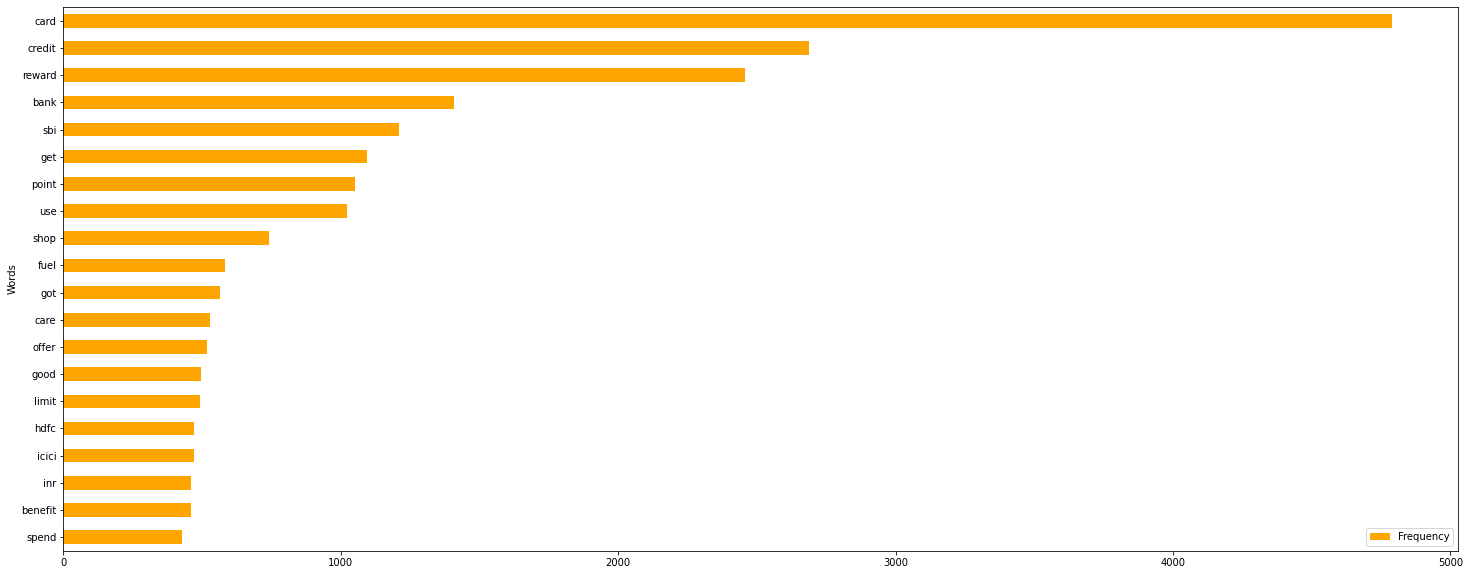

In [ ]:
fig,ax=plt.subplots(figsize=(25,10))
freq_word_df.sort_values(by='Frequency').plot.barh(x='Words',y='Frequency',ax=ax,color='orange')
plt.show();

In [ ]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
word_string=' '.join(freq_word_df.Words)
wordcloud=WordCloud(#stopwords=STOPWORDS,
                       background_color='black',
                     max_words=20
                      ).generate(word_string)


<Figure size 1080x720 with 0 Axes>

(-0.5, 399.5, 199.5, -0.5)

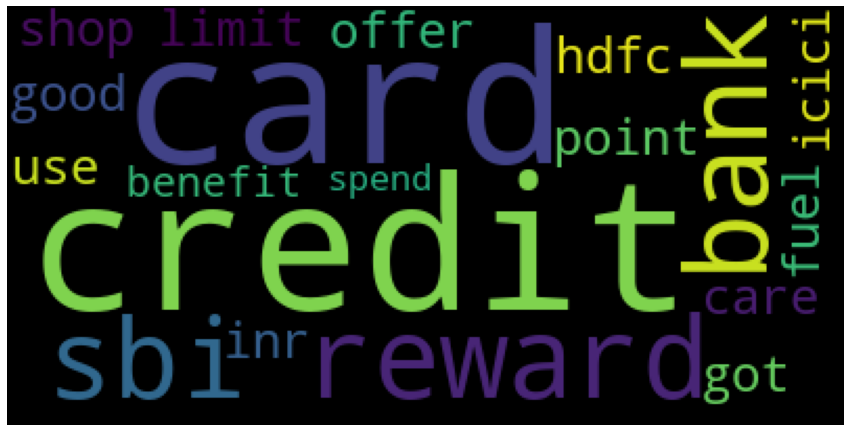

In [ ]:
plt.figure(figsize=(15,10))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Word2Vec

In [ ]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from gensim.models import Word2Vec
word2vec = Word2Vec(bagofwords, min_count=2)

In [ ]:
vocabulary = word2vec.wv.vocab
print(vocabulary)

{'first': <gensim.models.keyedvectors.Vocab object at 0x7f61d863bad0>, 'stay': <gensim.models.keyedvectors.Vocab object at 0x7f61d863bb10>, 'trident': <gensim.models.keyedvectors.Vocab object at 0x7f61d5fec110>, 'group': <gensim.models.keyedvectors.Vocab object at 0x7f61d5d5e3d0>, 'reward': <gensim.models.keyedvectors.Vocab object at 0x7f61d5d63b50>, 'bonu': <gensim.models.keyedvectors.Vocab object at 0x7f61d5d01c10>, 'point': <gensim.models.keyedvectors.Vocab object at 0x7f61d5d01c50>, 'shop': <gensim.models.keyedvectors.Vocab object at 0x7f61d5d01c90>, 'supermarket': <gensim.models.keyedvectors.Vocab object at 0x7f61d5d5e410>, 'watch': <gensim.models.keyedvectors.Vocab object at 0x7f61d5d01b90>, 'movi': <gensim.models.keyedvectors.Vocab object at 0x7f61d5d01cd0>, 'spend': <gensim.models.keyedvectors.Vocab object at 0x7f61d5d01d10>, 'sbi': <gensim.models.keyedvectors.Vocab object at 0x7f61d5d01d50>, 'card': <gensim.models.keyedvectors.Vocab object at 0x7f61d5d01d90>, 'use': <gensim.mo

In [ ]:
v1 = word2vec.wv['card']

In [ ]:
sim_words = word2vec.wv.most_similar('card')

In [ ]:
sim_words

[('past', 0.9989067316055298),
 ('year', 0.9988201856613159),
 ('appli', 0.9986541271209717),
 ('use', 0.9985592365264893),
 ('taken', 0.9980219602584839),
 ('provid', 0.9979814291000366),
 ('increas', 0.9973405003547668),
 ('l', 0.9972000122070312),
 ('less', 0.9971275329589844),
 ('icici', 0.9970849752426147)]

# Lexicon Model

In [ ]:
lex_file = open("/content/AFINN-111.csv", encoding="ISO-8859-1")

In [ ]:
word_list = []
print(word_list)
for  record in data:
    print("record")
    print(record)
    print("tokens")
    tokens = record.split()
    print(tokens)
    words = []
    for word in tokens:
        words.append(word.lower())
        print(words)
    
    word_list.append(words)
print("word_list")
print(word_list)

[]
record
comment
tokens
['comment']
['comment']
record
comments
tokens
['comments']
['comments']
word_list
[['comment'], ['comments']]


In [ ]:
#Strip the records and create a word list for each tweet
word_list = []
for record in (corpus):# for record in (comments):
    #print(record)
    words = []
    tokens = record.split()
    #print(tokens)
    for token in tokens:
        words.append(token.lower())
    word_list.append(words) 

In [ ]:
lexicons = {}
records = lex_file.readlines()
for record in records:
    #print(record) # line contains newline charecter
    #print(record.rstrip('\n').split(",")) - to remove new line charecter
    lexicons[record.rstrip('\n').split(",")[0]] = int(record.rstrip('\n').split(",")[1])
print(lexicons)
#lexicons["abandon"]

{'abandon': -2, 'abandoned': -2, 'abandons': -2, 'abducted': -2, 'abduction': -2, 'abductions': -2, 'abhor': -3, 'abhorred': -3, 'abhorrent': -3, 'abhors': -3, 'abilities': 2, 'ability': 2, 'aboard': 1, 'absentee': -1, 'absentees': -1, 'absolve': 2, 'absolved': 2, 'absolves': 2, 'absolving': 2, 'absorbed': 1, 'abuse': -3, 'abused': -3, 'abuses': -3, 'abusive': -3, 'accept': 1, 'accepted': 1, 'accepting': 1, 'accepts': 1, 'accident': -2, 'accidental': -2, 'accidentally': -2, 'accidents': -2, 'accomplish': 2, 'accomplished': 2, 'accomplishes': 2, 'accusation': -2, 'accusations': -2, 'accuse': -2, 'accused': -2, 'accuses': -2, 'accusing': -2, 'ache': -2, 'achievable': 1, 'aching': -2, 'acquit': 2, 'acquits': 2, 'acquitted': 2, 'acquitting': 2, 'acrimonious': -3, 'active': 1, 'adequate': 1, 'admire': 3, 'admired': 3, 'admires': 3, 'admiring': 3, 'admit': -1, 'admits': -1, 'admitted': -1, 'admonish': -2, 'admonished': -2, 'adopt': 1, 'adopts': 1, 'adorable': 3, 'adore': 3, 'adored': 3, 'ado

In [ ]:
strength = []
for Comments in word_list:
    score = 0
    for word in Comments:
        if word in (lexicons):
            score = score + lexicons[word]
    strength.append(score)

In [ ]:
#senti_matrix = pd.DataFrame(strength, data.comment)

In [ ]:
#senti_matrix[0:10]

# Polarity by TextBlob

In [ ]:
sentiment_text = [TextBlob(Comments) for Comments in corpus]
print(sentiment_text[10].polarity)
print(sentiment_text[10])

0.0
like amaz reward card sbi


In [ ]:
sentiments = [[Comments.sentiment.polarity, str(Comments)] for Comments in sentiment_text]
sentiment_df = pd.DataFrame(sentiments, columns=["Polarity","User Comments"])
sentiment_df.sort_values(by='Polarity',ascending=False) 

,Polarity,User Comments
870,1.0,perfect lifestyl travel card given multitud be...
834,1.0,redeem reward point bpcl voucher sbi best
1559,1.0,happi sbi card perfect got discount onlin shop
276,1.0,balanc transfer flexi pay scheme reward priori...
1785,1.0,perfect card humong varieti shop benefit
...,...,...
4628,-1.0,worst credit card ever bank chase give stateme...
3357,-1.0,worst servic flipkart axi credit
4062,-1.0,icici bank ki credit card ki custom care ki se...
4027,-1.0,hdfc worst bank ever dont option updat address...


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f61cfb72d50>],
      dtype=object)

Text(0.5, 1.0, 'Sentiments Distribution on Automotive Gadgets')

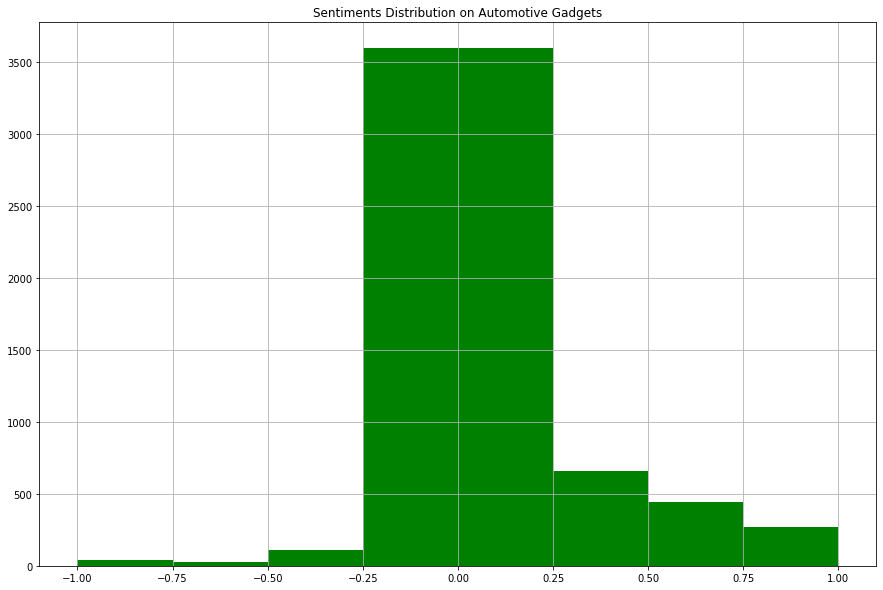

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

#Plot histogram of the polarity values
sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1], ax=ax, color="green")
plt.title("Sentiments Distribution on Automotive Gadgets")
plt.show()

# Category from Polarity

In [ ]:
sentiment_df.groupby('Polarity').size()

Polarity
-1.000000     32
-0.800000      7
-0.750000      1
-0.714286      1
-0.700000     19
            ... 
 0.800000     51
 0.833333      1
 0.850000     17
 0.900000      9
 1.000000    171
Length: 300, dtype: int64

In [ ]:
bins=(-1.000000,-0.250000,0.250000,1.000000)
names=['Negative','Neutral','Positive']
sentiment_df['Polarity_type']=pd.cut(sentiment_df['Polarity'],bins,labels=names)

In [ ]:
sentiment_df.groupby('Polarity_type').size()

Polarity_type
Negative     171
Neutral     3663
Positive    1278
dtype: int64

In [ ]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Polarity       5144 non-null   float64 
 1   User Comments  5144 non-null   object  
 2   Polarity_type  5112 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 85.7+ KB


In [ ]:
sentiment_df.columns

Index(['Polarity', 'User Comments', 'Polarity_type'], dtype='object')

In [ ]:
sentiment_df.columns = ['Polarity', 'UserComments', 'Polarity_type']

In [ ]:
dfp = pd.DataFrame(data=sentiment_df,
                    columns=['Polarity', 'UserComments', 'Polarity_type'])
dfp

,Polarity,UserComments,Polarity_type
0,0.250000,first stay trident group reward bonu point,Neutral
1,0.000000,shop supermarket watch movi spend sbi card reward,Neutral
2,0.700000,use card year benefit reward good,Positive
3,0.000000,card inde one offer reward fuel save benefit c...,Neutral
4,1.000000,valueback deal fuel perfect benefit card,Positive
...,...,...,...
5139,0.000000,nation payment corpor india npci npci launch y...,Neutral
5140,0.357143,pleas make special sale laptop also hdfc sbi c...,Positive
5141,0.000000,care receiv credit cardther credit limit inste...,Neutral
5142,0.000000,support hi cred teamth amount deduct twice pay...,Neutral


***Identify & Treat NaN***

In [ ]:
pd.isnull(dfp)

,Polarity,UserComments,Polarity_type
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
5139,False,False,False
5140,False,False,False
5141,False,False,False
5142,False,False,False


In [ ]:
# importing pandas package
import pandas as pd

# making data frame from excel file
#dataN = pd.read_excel("export_User_Comments_Polarity_Category.xlsx")

# creating bool series True for NaN values
#dataN_series = pd.isnull(dataN["Polarity_type"])
dataN_series = pd.isnull(dfp["Polarity_type"])

# filtering data
# displayind data only with team = NaN
#dataN[dataN_series]
dfp[dataN_series]

,Polarity,UserComments,Polarity_type
3116,-1.0,care bank worst credit card depart ask interes...,NaN
3145,-1.0,pleas dont take axi credit card worst servic f...,NaN
3146,-1.0,axi credit card worst peopl call centr call em...,NaN
3357,-1.0,worst servic flipkart axi credit,NaN
3366,-1.0,worst servic axi bank dear plz dont take credi...,NaN
3408,-1.0,connect worst credit card compani india credit...,NaN
3415,-1.0,connect worst servic sbi credit card depart do...,NaN
3444,-1.0,arvind credit card sbi close worst custom serv...,NaN
3625,-1.0,kindli suggest cancel axi bank credit card set...,NaN
3674,-1.0,care worst bank without permiss block icici cr...,NaN


In [ ]:
# importing pandas module 
import pandas as pd 

# making data frame from csv file 
#dataN2 = pd.read_excel("export_User_Comments_Polarity_Category.xlsx")

# replacing na values in college with No college 
#dataN2["Polarity_type"].fillna("Negative", inplace = True) 
dfp["Polarity_type"].fillna("Negative", inplace = True)

dfp

,Polarity,UserComments,Polarity_type
0,0.250000,first stay trident group reward bonu point,Neutral
1,0.000000,shop supermarket watch movi spend sbi card reward,Neutral
2,0.700000,use card year benefit reward good,Positive
3,0.000000,card inde one offer reward fuel save benefit c...,Neutral
4,1.000000,valueback deal fuel perfect benefit card,Positive
...,...,...,...
5139,0.000000,nation payment corpor india npci npci launch y...,Neutral
5140,0.357143,pleas make special sale laptop also hdfc sbi c...,Positive
5141,0.000000,care receiv credit cardther credit limit inste...,Neutral
5142,0.000000,support hi cred teamth amount deduct twice pay...,Neutral


In [ ]:
dfp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Polarity       5144 non-null   float64 
 1   UserComments   5144 non-null   object  
 2   Polarity_type  5144 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 85.7+ KB


In [ ]:
#Export to Excel
from pandas import ExcelWriter
writer = ExcelWriter('export_User_Comments_Polarity_Category.xlsx')
dfp.to_excel(writer,'Sheet1',index=False)
writer.save()

# EDA of Catarorized Data

In [ ]:
dfc = pd.read_excel('/content/export_User_Comments_Polarity_Category.xlsx')

In [ ]:
dfc.columns
dfc.info()
dfc.shape

Index(['Polarity', 'UserComments', 'Polarity_type'], dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Polarity       5144 non-null   float64
 1   UserComments   5138 non-null   object 
 2   Polarity_type  5144 non-null   object 
dtypes: float64(1), object(2)
memory usage: 120.7+ KB


(5144, 3)

In [ ]:
dfc.head()

,Polarity,UserComments,Polarity_type
0,0.25,first stay trident group reward bonu point,Neutral
1,0.00,shop supermarket watch movi spend sbi card reward,Neutral
2,0.70,use card year benefit reward good,Positive
3,0.00,card inde one offer reward fuel save benefit c...,Neutral
4,1.00,valueback deal fuel perfect benefit card,Positive


In [ ]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

6.0
4.0


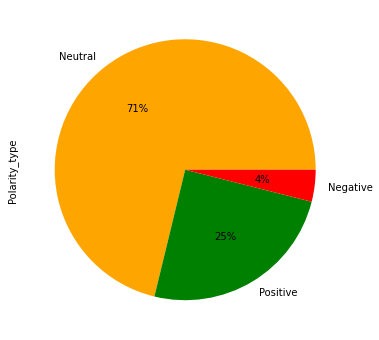

In [ ]:
dfc.Polarity_type.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["orange","green","red"])

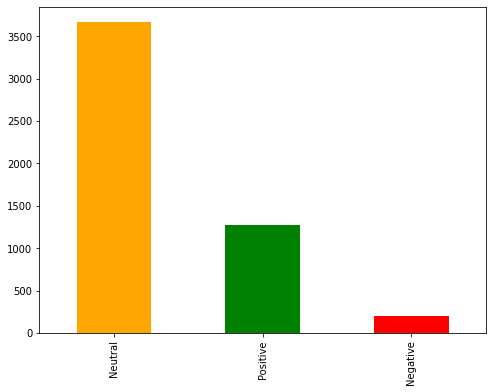

In [ ]:
dfc.Polarity_type.value_counts().plot(kind='bar',  color=["orange","green","red"])

# TF-IDF

***Vectorizing Dataset using TF-IDF***

In [ ]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(corpus).toarray()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(processed_features, dfc.Polarity_type, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4115, 779)
(1029, 779)
(4115,)
(1029,)


# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

***Making Predictions and Evaluating the Model for Random Forest Classifier***

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[ 31  13   0]
 [  3 702  18]
 [  0  30 232]]
              precision    recall  f1-score   support

    Negative       0.91      0.70      0.79        44
     Neutral       0.94      0.97      0.96       723
    Positive       0.93      0.89      0.91       262

    accuracy                           0.94      1029
   macro avg       0.93      0.85      0.89      1029
weighted avg       0.94      0.94      0.94      1029

0.9378036929057337


In [ ]:
def clean_comment_length(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words) )

In [ ]:
def comment_to_words(UserComments):
    letters_only = re.sub("[^a-zA-Z]", " ",UserComments) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

In [ ]:
dfp['clean_comment']=dfp['UserComments'].apply(lambda x: comment_to_words(x))
dfp['comment_length']=dfp['UserComments'].apply(lambda x: clean_comment_length(x))
train,test = train_test_split(dfp,test_size=0.25,random_state=42)

In [ ]:
train_clean_comment=[]
for comment in train['clean_comment']:
    train_clean_comment.append(comment)
test_clean_comment=[]
for comment in test['clean_comment']:
    test_clean_comment.append(comment)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_comment)
test_features=v.transform(test_clean_comment)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import KFold, cross_val_score
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
num_folds = 10
seed = 90
scoring = 'accuracy'

In [ ]:
from pandas.core.common import random_state
# ensembles Modelling
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
ensembles.append(('XGB', XGBClassifier(n_estimators=10)))
results = []
names = []
for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=None)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: 0.807537 (0.016966)
GBM: 0.936088 (0.010418)
RF: 0.921998 (0.009136)
ET: 0.939247 (0.006955)
XGB: 0.839127 (0.016877)


In [ ]:
#Classifiers
Classifiers = [
    SVC(kernel="rbf", C=0.03, gamma = 'scale'),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GradientBoostingClassifier(),
    GaussianNB(),
    AdaBoostClassifier(),
    ExtraTreesClassifier(n_estimators=100),
    XGBClassifier(n_estimators=100)
    ]

In [ ]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for clf in Classifiers:
    try:
        fit = clf.fit(train_features,train['Polarity_type'])
        pred = fit.predict(test_features)
    except Exception:
        fit = clf.fit(dense_features,train['Polarity_type'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['Polarity_type'])
    Accuracy.append(accuracy)
    Model.append(clf.__class__.__name__)
    print('Accuracy of '+clf.__class__.__name__+' is '+str(accuracy)) 
    print(classification_report(pred,test['Polarity_type']))
    


Accuracy of SVC is 0.7037325038880249
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00         0
     Neutral       1.00      0.70      0.83      1286
    Positive       0.00      0.00      0.00         0

    accuracy                           0.70      1286
   macro avg       0.33      0.23      0.28      1286
weighted avg       1.00      0.70      0.83      1286

Accuracy of DecisionTreeClassifier is 0.9525660964230172
              precision    recall  f1-score   support

    Negative       0.84      0.83      0.83        52
     Neutral       0.96      0.97      0.97       897
    Positive       0.94      0.92      0.93       337

    accuracy                           0.95      1286
   macro avg       0.92      0.91      0.91      1286
weighted avg       0.95      0.95      0.95      1286



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of RandomForestClassifier is 0.9362363919129082
              precision    recall  f1-score   support

    Negative       0.61      0.97      0.75        32
     Neutral       0.98      0.93      0.96       948
    Positive       0.87      0.94      0.90       306

    accuracy                           0.94      1286
   macro avg       0.82      0.95      0.87      1286
weighted avg       0.94      0.94      0.94      1286

Accuracy of GradientBoostingClassifier is 0.9510108864696734
              precision    recall  f1-score   support

    Negative       0.82      0.91      0.87        46
     Neutral       0.97      0.96      0.97       918
    Positive       0.91      0.93      0.92       322

    accuracy                           0.95      1286
   macro avg       0.90      0.94      0.92      1286
weighted avg       0.95      0.95      0.95      1286

Accuracy of GaussianNB is 0.5427682737169518
              precision    recall  f1-score   support

    Negative       0

In [ ]:
    # #Confusion Matrix
    # cm = confusion_matrix(pred,test['Polarity_type'])
    # plt.figure()
    # plot_confusion_matrix(cm,cmap=plt.cm.Blues)
    # plt.xticks(range(3), ['Negative','Neutral','Positive'],color='black')
    # plt.yticks(range(3), ['Negative','Neutral','Positive'])
    # plt.xlabel('Predicted Label')
    # plt.ylabel('True Label')
    # plt.show()

# Topic Modeling

# Comparison of Model Accuracies

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


<BarContainer object of 8 artists>

([<matplotlib.axis.XTick at 0x7f61c5326790>,
 [Text(0, 0, 'SVC'),
  Text(0, 0, 'DecisionTreeClassifier'),
  Text(0, 0, 'RandomForestClassifier'),
  Text(0, 0, 'GradientBoostingClassifier'),
  Text(0, 0, 'GaussianNB'),
  Text(0, 0, 'AdaBoostClassifier'),
  Text(0, 0, 'ExtraTreesClassifier'),
  Text(0, 0, 'XGBClassifier')])

Text(0, 0.5, 'Accuracy')

Text(0.5, 0, 'Model')

Text(0.5, 1.0, 'Classifier Accuracies')

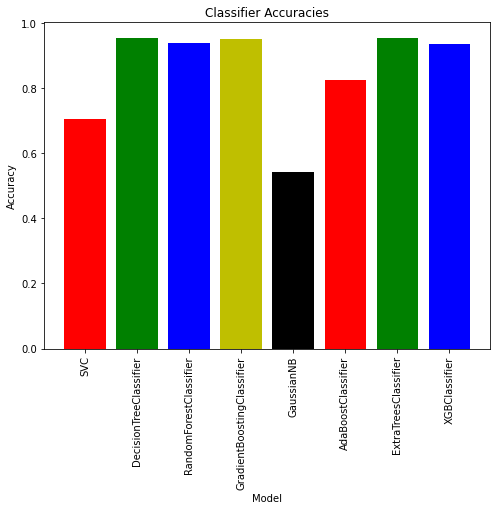

In [ ]:
index=list(range(len(Classifiers)))
plt.bar(index,Accuracy,color='rgbyk')
plt.xticks(index,Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Classifier Accuracies')

# Deeplearning

In [ ]:
from keras.preprocessing import sequence

In [ ]:
dpl = pd.read_excel('/content/export_User_Comments_Polarity_Category.xlsx')

In [ ]:
dpl.head()

,Polarity,UserComments,Polarity_type
0,0.25,first stay trident group reward bonu point,Neutral
1,0.00,shop supermarket watch movi spend sbi card reward,Neutral
2,0.70,use card year benefit reward good,Positive
3,0.00,card inde one offer reward fuel save benefit c...,Neutral
4,1.00,valueback deal fuel perfect benefit card,Positive


In [ ]:
senti_map = {
    'Negative' : 1,
    'Neutral' : 0,
    'Positive' : 2
}
dpl['Label'] = dpl['Polarity_type'].map(senti_map)
print(dpl)

      Polarity                                       UserComments  \
0     0.250000         first stay trident group reward bonu point   
1     0.000000  shop supermarket watch movi spend sbi card reward   
2     0.700000                  use card year benefit reward good   
3     0.000000  card inde one offer reward fuel save benefit c...   
4     1.000000           valueback deal fuel perfect benefit card   
...        ...                                                ...   
5139  0.000000  nation payment corpor india npci npci launch y...   
5140  0.357143  pleas make special sale laptop also hdfc sbi c...   
5141  0.000000  care receiv credit cardther credit limit inste...   
5142  0.000000  support hi cred teamth amount deduct twice pay...   
5143  0.000000  connect stop loot peopl genuin pathet experi o...   

     Polarity_type  Label  
0          Neutral      0  
1          Neutral      0  
2         Positive      2  
3          Neutral      0  
4         Positive      2  
...

In [ ]:
dpl_data = dpl[dpl['Polarity_type'] != 'Neutral']

In [ ]:
dpl_data

,Polarity,UserComments,Polarity_type,Label
2,0.700000,use card year benefit reward good,Positive,2
4,1.000000,valueback deal fuel perfect benefit card,Positive,2
8,0.700000,tini reward redempt fee reward good,Positive,2
9,0.300000,got reward worth sbi exceed spend lac,Positive,2
12,0.420000,sinc year use citi bank reward credit card lif...,Positive,2
...,...,...,...,...
5128,0.700000,good phoneif sbi credit card use youll get,Positive,2
5132,-0.300000,connect sir complaint still pend want waival a...,Negative,1
5135,-0.500000,payment sbi credit card club feb via upi payme...,Negative,1
5138,-1.000000,connect worst credit card compani get cardlast...,Negative,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Label')

Text(0.5, 1.0, 'Number of Sentiment messages')

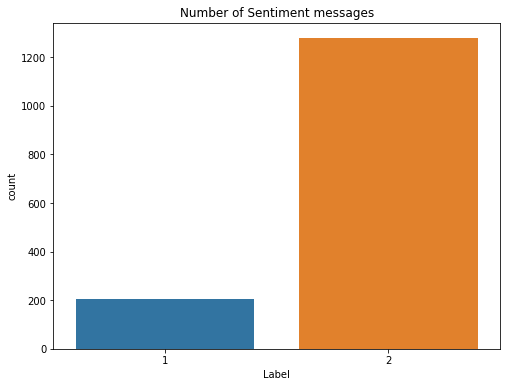

In [ ]:
#Explore the class distribution
sns.countplot(dpl_data['Label'])
plt.xlabel('Label')
plt.title('Number of Sentiment messages')

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.8 MB 25.9 MB/s 
     |████████████████████████████████| 6.5 MB 40.9 MB/s 
     |████████████████████████████████| 67 kB 2.3 MB/s 
     |████████████████████████████████| 895 kB 47.8 MB/s 
     |████████████████████████████████| 596 kB 44.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import pipeline

In [ ]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/255M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
classifier("sinc year use citi bank reward credit card life time free card given credit limit rs use card shop purpos get credit card statement email bank provid good servic rate interest high")

[{'label': 'NEGATIVE', 'score': 0.9727625250816345}]

In [ ]:
import pandas as pd

In [ ]:
df_web = pd.read_csv('/content/reviews_credit_card_data.csv')
df_web.info()
df_web.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3074 entries, 0 to 3073
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   bank_name        3074 non-null   object
 1   bank_name_short  3074 non-null   object
 2   card_category    3074 non-null   object
 3   reviews          3074 non-null   object
dtypes: object(4)
memory usage: 96.2+ KB


(3074, 4)

In [ ]:
df_web_25 = df_web['reviews']

In [ ]:
df_web_25

0       On my first stay with the Trident Group, I was...
1       From shopping at the supermarkets to watching ...
2       Have been using this card for over 2 years now...
3       This card is indeed the one that offers the mo...
4       The Valueback deals on fuels are the perfect b...
                              ...                        
3069    I like the good variety in rewards and the ben...
3070    I have taken ICICI credit card through bank an...
3071    The more I spend, the more I get rewarded. It ...
3072    I enjoy using my SBI card a lot. It fetches me...
3073    BPCL is the perfect card that helps the users ...
Name: reviews, Length: 3074, dtype: object

In [ ]:
x=[]
j=0
for i in df_web_25:
  x.append(classifier(i))
  #print(i, x[j])
  j = j+1 

  with open("/content/senti_reviews.txt", "w") as file1:
      # Writing data to a file
    file1.write(str(x))
  
  file1.close()

54

108

162

215

269

323

377

431

485

539

593

647

701

755

809

863

917

971

1024

1078

1131

1185

1239

1293

1347

1401

1455

1509

1563

1617

1671

1725

1779

1833

1886

1940

1994

2048

2102

2156

2210

2264

2318

2372

2426

2480

2533

2587

2641

2695

2749

2803

2857

2911

2963

3017

3071

3125

3179

3233

3287

3341

3395

3449

3503

3556

3610

3664

3717

3769

3823

3876

3930

3984

4038

4091

4145

4199

4253

4307

4361

4415

4469

4523

4577

4631

4684

4738

4790

4844

4898

4952

5006

5060

5114

5168

5221

5275

5329

5382

5436

5489

5543

5597

5651

5705

5759

5813

5867

5920

5973

6027

6081

6135

6189

6243

6297

6350

6404

6458

6512

6566

6620

6674

6728

6782

6836

6890

6944

6996

7050

7104

7158

7212

7266

7320

7374

7428

7482

7536

7590

7644

7698

7752

7806

7860

7913

7966

8020

8074

8128

8182

8236

8290

8344

8398

8452

8506

8560

8614

8668

8722

8776

8830

8884

8938

8992

9046

9100

9154

9208

9262

9315

9369

9423

9477

9531

9585

9639

9693

9747

9801

9855

9909

9963

10017

10071

10125

10178

10232

10286

10340

10393

10447

10501

10555

10609

10663

10716

10770

10824

10878

10932

10986

11040

11093

11147

11201

11255

11308

11362

11416

11470

11524

11578

11632

11685

11739

11793

11847

11900

11954

12008

12062

12116

12170

12224

12278

12332

12386

12440

12494

12548

12602

12656

12710

12764

12817

12871

12925

12979

13033

13087

13141

13195

13249

13303

13357

13411

13465

13519

13573

13627

13681

13735

13789

13843

13896

13950

14004

14058

14112

14166

14220

14274

14327

14381

14434

14488

14542

14594

14648

14702

14756

14810

14864

14918

14972

15026

15079

15133

15187

15241

15295

15349

15403

15457

15511

15565

15619

15672

15726

15780

15834

15888

15942

15996

16050

16104

16158

16212

16266

16320

16374

16428

16480

16534

16588

16642

16695

16749

16803

16857

16911

16965

17019

17073

17127

17181

17235

17289

17343

17397

17451

17505

17559

17613

17667

17721

17775

17829

17883

17937

17991

18045

18099

18152

18206

18260

18314

18366

18420

18474

18528

18582

18636

18690

18743

18797

18851

18905

18959

19013

19067

19121

19175

19229

19283

19337

19391

19445

19499

19553

19607

19661

19715

19769

19823

19877

19931

19985

20039

20093

20147

20201

20255

20309

20363

20417

20470

20524

20578

20632

20686

20740

20794

20848

20901

20955

21009

21063

21117

21171

21225

21279

21333

21386

21440

21494

21548

21602

21656

21710

21764

21818

21872

21926

21980

22034

22088

22142

22196

22250

22304

22357

22411

22465

22519

22573

22627

22680

22734

22788

22842

22896

22950

23004

23057

23111

23164

23218

23272

23326

23380

23434

23488

23542

23596

23649

23703

23757

23811

23864

23918

23972

24026

24080

24134

24188

24241

24294

24347

24401

24455

24509

24563

24617

24669

24723

24777

24830

24884

24938

24992

25046

25100

25154

25208

25262

25315

25369

25423

25477

25531

25585

25639

25693

25747

25800

25854

25907

25961

26015

26069

26122

26176

26230

26284

26338

26392

26446

26500

26554

26608

26662

26715

26769

26823

26876

26929

26983

27036

27090

27144

27198

27251

27304

27358

27412

27466

27520

27574

27628

27682

27736

27790

27844

27898

27952

28006

28060

28114

28168

28222

28276

28330

28384

28438

28492

28546

28600

28653

28706

28760

28814

28867

28921

28975

29029

29083

29137

29190

29243

29297

29351

29405

29459

29513

29567

29621

29674

29728

29782

29836

29890

29944

29998

30052

30106

30160

30214

30266

30320

30374

30428

30482

30536

30590

30643

30697

30751

30805

30859

30913

30967

31021

31074

31128

31182

31236

31290

31344

31398

31452

31506

31560

31614

31668

31722

31775

31829

31883

31937

31991

32045

32099

32153

32207

32260

32314

32368

32421

32475

32528

32581

32635

32689

32743

32797

32851

32905

32959

33013

33067

33120

33174

33226

33280

33334

33388

33442

33496

33549

33603

33656

33710

33764

33818

33872

33926

33980

34034

34088

34142

34196

34250

34303

34357

34411

34465

34519

34573

34627

34681

34735

34788

34842

34896

34950

35004

35058

35112

35165

35219

35273

35327

35381

35435

35489

35543

35597

35651

35705

35759

35813

35867

35921

35975

36029

36083

36137

36191

36245

36299

36352

36406

36460

36514

36568

36622

36676

36730

36784

36838

36892

36946

36999

37053

37107

37160

37214

37267

37321

37375

37429

37483

37537

37591

37644

37698

37752

37806

37860

37914

37968

38022

38076

38130

38184

38238

38291

38345

38398

38452

38506

38560

38614

38668

38722

38774

38828

38882

38936

38990

39044

39098

39152

39206

39259

39313

39367

39421

39475

39529

39583

39637

39691

39745

39799

39853

39907

39961

40014

40068

40122

40176

40230

40284

40337

40391

40445

40499

40553

40607

40661

40715

40768

40822

40876

40930

40984

41038

41090

41142

41196

41250

41304

41358

41412

41465

41519

41573

41627

41681

41735

41789

41843

41897

41950

42004

42058

42112

42166

42220

42274

42328

42382

42436

42490

42544

42597

42651

42705

42757

42810

42864

42918

42972

43026

43080

43132

43186

43240

43294

43348

43402

43456

43510

43564

43618

43672

43726

43780

43834

43888

43942

43996

44050

44103

44157

44211

44265

44319

44373

44427

44480

44534

44588

44642

44696

44750

44804

44858

44912

44966

45019

45073

45127

45181

45235

45289

45343

45397

45451

45504

45558

45612

45665

45719

45773

45827

45881

45935

45989

46043

46097

46151

46205

46259

46313

46367

46421

46475

46529

46583

46637

46691

46745

46798

46852

46906

46960

47014

47068

47122

47176

47229

47283

47337

47391

47445

47499

47553

47607

47661

47715

47769

47823

47877

47931

47985

48039

48093

48147

48200

48254

48308

48362

48416

48470

48524

48578

48631

48685

48738

48792

48846

48900

48954

49006

49060

49114

49168

49222

49276

49330

49384

49438

49491

49545

49599

49653

49707

49761

49815

49869

49923

49977

50031

50084

50138

50192

50246

50300

50354

50408

50462

50515

50569

50623

50677

50731

50785

50839

50893

50947

51001

51055

51109

51163

51217

51271

51324

51378

51431

51485

51539

51593

51647

51701

51755

51809

51862

51916

51970

52024

52078

52132

52186

52240

52294

52348

52402

52456

52510

52564

52618

52672

52726

52780

52834

52888

52942

52996

53050

53104

53158

53212

53266

53320

53374

53428

53482

53536

53590

53644

53698

53752

53806

53860

53914

53968

54021

54075

54129

54183

54237

54291

54345

54399

54453

54507

54561

54615

54669

54723

54777

54830

54884

54937

54991

55045

55099

55152

55206

55260

55314

55368

55422

55476

55530

55584

55638

55692

55746

55800

55854

55908

55962

56016

56070

56124

56177

56230

56284

56338

56392

56446

56500

56554

56608

56662

56716

56770

56824

56878

56932

56986

57040

57094

57148

57202

57256

57310

57364

57418

57472

57526

57580

57634

57688

57742

57796

57850

57904

57957

58011

58064

58118

58172

58226

58279

58333

58387

58441

58495

58549

58603

58657

58711

58765

58819

58873

58927

58981

59035

59089

59143

59197

59251

59305

59358

59412

59466

59520

59574

59628

59682

59736

59790

59844

59898

59951

60005

60059

60113

60167

60221

60275

60329

60383

60437

60491

60545

60599

60653

60707

60761

60814

60868

60922

60976

61030

61084

61138

61192

61246

61300

61354

61408

61461

61515

61569

61623

61677

61731

61782

61836

61890

61944

61998

62052

62106

62159

62213

62267

62321

62373

62427

62481

62535

62589

62643

62697

62751

62805

62858

62912

62965

63019

63072

63126

63180

63234

63288

63342

63396

63450

63503

63557

63611

63662

63716

63769

63823

63877

63931

63985

64039

64093

64147

64201

64255

64309

64363

64416

64470

64524

64578

64632

64686

64739

64793

64847

64901

64955

65009

65062

65116

65170

65224

65278

65332

65385

65439

65493

65547

65601

65655

65709

65763

65817

65871

65925

65979

66033

66087

66140

66194

66248

66302

66356

66410

66464

66518

66572

66626

66680

66734

66788

66842

66896

66950

67004

67058

67112

67166

67220

67274

67327

67381

67435

67489

67543

67597

67651

67705

67759

67813

67867

67921

67975

68029

68083

68137

68191

68245

68299

68353

68407

68461

68514

68568

68622

68675

68729

68783

68837

68891

68945

68999

69053

69107

69161

69215

69269

69323

69377

69431

69485

69539

69593

69647

69701

69755

69808

69862

69916

69970

70024

70078

70132

70186

70240

70294

70348

70402

70456

70510

70564

70618

70672

70726

70779

70833

70887

70941

70995

71049

71103

71156

71210

71264

71318

71372

71425

71479

71533

71587

71641

71695

71749

71803

71857

71911

71965

72019

72073

72127

72181

72235

72289

72343

72397

72449

72503

72557

72611

72664

72717

72771

72825

72879

72932

72986

73039

73092

73146

73200

73254

73308

73362

73416

73470

73524

73578

73632

73686

73740

73794

73848

73902

73956

74010

74064

74118

74172

74226

74280

74334

74388

74442

74496

74550

74604

74658

74712

74766

74820

74874

74928

74982

75036

75090

75143

75197

75251

75305

75359

75413

75466

75520

75574

75628

75682

75736

75790

75844

75898

75952

76006

76060

76114

76168

76222

76275

76329

76383

76437

76491

76545

76599

76653

76707

76761

76814

76868

76922

76976

77030

77083

77137

77191

77245

77299

77353

77407

77461

77515

77569

77623

77675

77729

77783

77835

77888

77942

77996

78050

78104

78156

78210

78264

78318

78371

78424

78478

78532

78586

78639

78693

78747

78801

78855

78909

78963

79017

79071

79125

79179

79233

79287

79341

79394

79448

79502

79556

79610

79664

79718

79772

79826

79880

79934

79988

80042

80096

80150

80204

80258

80312

80366

80420

80474

80528

80582

80636

80690

80744

80798

80852

80906

80960

81013

81067

81121

81175

81228

81282

81336

81390

81444

81498

81552

81606

81659

81713

81765

81819

81873

81927

81981

82035

82089

82143

82197

82251

82305

82359

82413

82465

82519

82572

82626

82680

82734

82788

82842

82896

82949

83003

83057

83111

83165

83219

83273

83326

83380

83434

83488

83542

83596

83650

83704

83758

83812

83865

83919

83973

84027

84081

84135

84189

84243

84297

84351

84405

84459

84513

84567

84621

84675

84729

84783

84837

84891

84945

84999

85053

85107

85161

85215

85269

85323

85377

85431

85485

85539

85593

85647

85701

85754

85808

85862

85916

85969

86023

86077

86131

86185

86239

86293

86347

86399

86453

86507

86561

86615

86669

86723

86777

86831

86885

86938

86992

87046

87100

87154

87208

87261

87315

87369

87423

87476

87530

87584

87638

87692

87746

87800

87854

87908

87962

88015

88069

88122

88176

88230

88284

88338

88392

88446

88500

88554

88608

88662

88716

88770

88824

88878

88932

88986

89040

89094

89148

89202

89255

89309

89363

89417

89471

89525

89579

89633

89686

89740

89793

89846

89900

89954

90007

90061

90115

90169

90223

90277

90331

90384

90438

90492

90546

90599

90653

90707

90761

90815

90869

90923

90977

91031

91085

91139

91193

91247

91301

91355

91409

91463

91517

91571

91625

91679

91733

91787

91840

91894

91948

92002

92055

92109

92163

92217

92271

92324

92378

92432

92486

92540

92594

92648

92702

92756

92809

92862

92916

92970

93024

93078

93132

93186

93240

93294

93348

93402

93455

93509

93563

93617

93671

93725

93779

93833

93887

93941

93995

94049

94103

94157

94211

94265

94319

94373

94427

94481

94535

94589

94642

94696

94750

94804

94858

94912

94966

95019

95073

95127

95181

95235

95289

95343

95397

95451

95505

95559

95613

95667

95721

95775

95829

95883

95936

95990

96044

96098

96152

96206

96260

96314

96368

96422

96476

96530

96581

96635

96689

96743

96797

96851

96905

96959

97013

97067

97121

97174

97228

97282

97336

97390

97443

97497

97551

97605

97659

97713

97767

97820

97873

97926

97980

98034

98087

98140

98194

98247

98301

98355

98409

98463

98517

98571

98625

98679

98733

98787

98841

98895

98949

99003

99057

99111

99165

99219

99273

99327

99381

99435

99489

99543

99596

99650

99704

99758

99812

99866

99920

99974

100028

100081

100135

100189

100243

100297

100351

100405

100459

100513

100567

100621

100675

100729

100783

100837

100891

100945

100999

101052

101106

101160

101214

101268

101322

101376

101430

101484

101538

101592

101646

101700

101754

101808

101861

101914

101968

102022

102076

102129

102183

102237

102291

102344

102397

102451

102504

102558

102612

102666

102719

102773

102827

102881

102935

102989

103043

103097

103151

103205

103259

103313

103367

103421

103475

103529

103583

103636

103690

103743

103797

103851

103905

103959

104013

104066

104120

104174

104228

104282

104336

104390

104444

104498

104552

104606

104659

104713

104767

104821

104875

104929

104983

105037

105090

105144

105198

105252

105304

105358

105412

105465

105519

105573

105627

105681

105735

105789

105843

105897

105950

106004

106058

106111

106165

106219

106273

106327

106381

106435

106489

106543

106597

106651

106705

106759

106813

106867

106921

106975

107029

107083

107137

107191

107245

107299

107353

107407

107461

107515

107569

107623

107676

107730

107784

107837

107891

107945

107999

108053

108107

108161

108215

108268

108322

108376

108430

108484

108538

108592

108646

108700

108754

108808

108862

108916

108970

109024

109078

109132

109186

109240

109294

109348

109402

109456

109510

109564

109618

109671

109725

109779

109832

109886

109940

109994

110048

110102

110156

110210

110264

110318

110372

110425

110479

110533

110587

110641

110695

110749

110803

110857

110911

110965

111019

111073

111127

111181

111235

111289

111342

111396

111450

111504

111558

111612

111666

111720

111774

111826

111880

111934

111988

112042

112096

112150

112204

112258

112312

112366

112420

112474

112527

112581

112635

112689

112743

112797

112851

112904

112958

113012

113066

113120

113174

113227

113281

113335

113389

113443

113497

113550

113604

113658

113712

113766

113820

113874

113928

113982

114036

114090

114144

114198

114252

114306

114360

114414

114467

114521

114575

114629

114683

114737

114790

114844

114898

114952

115006

115060

115114

115168

115222

115276

115330

115384

115438

115492

115546

115600

115654

115708

115762

115816

115869

115923

115977

116031

116085

116139

116192

116245

116299

116353

116407

116461

116515

116569

116623

116677

116731

116785

116839

116893

116947

117001

117055

117109

117163

117216

117270

117324

117377

117431

117485

117539

117593

117647

117701

117755

117808

117862

117916

117970

118023

118077

118131

118185

118239

118293

118347

118401

118455

118509

118563

118617

118671

118725

118779

118833

118887

118941

118995

119049

119103

119157

119211

119263

119317

119371

119425

119479

119533

119586

119640

119694

119748

119802

119856

119910

119964

120018

120072

120126

120180

120233

120287

120341

120395

120449

120503

120557

120610

120664

120718

120772

120826

120880

120933

120987

121040

121094

121148

121202

121256

121310

121364

121418

121472

121526

121580

121634

121688

121742

121796

121850

121904

121956

122010

122064

122118

122172

122226

122280

122334

122388

122442

122496

122550

122604

122658

122712

122766

122820

122874

122928

122982

123036

123090

123144

123198

123252

123306

123360

123414

123467

123521

123575

123629

123683

123737

123791

123845

123899

123953

124007

124061

124115

124169

124223

124277

124330

124384

124438

124492

124546

124600

124654

124708

124761

124814

124868

124922

124975

125029

125083

125137

125191

125245

125299

125353

125406

125460

125514

125568

125622

125676

125730

125783

125836

125890

125944

125998

126052

126106

126160

126214

126268

126322

126376

126430

126483

126537

126590

126644

126698

126752

126805

126859

126913

126967

127021

127075

127129

127183

127237

127291

127345

127399

127453

127507

127561

127615

127669

127723

127777

127831

127885

127939

127993

128046

128099

128153

128207

128261

128315

128369

128423

128476

128530

128584

128638

128692

128746

128800

128854

128908

128962

129016

129069

129123

129177

129231

129285

129339

129393

129447

129501

129555

129609

129663

129717

129771

129825

129878

129932

129986

130040

130094

130148

130202

130256

130310

130364

130418

130472

130526

130580

130634

130688

130742

130796

130849

130903

130957

131011

131065

131119

131173

131227

131281

131335

131389

131443

131497

131551

131605

131659

131713

131767

131821

131875

131928

131982

132036

132090

132144

132198

132252

132306

132360

132413

132467

132521

132575

132629

132683

132736

132790

132842

132896

132950

133004

133058

133112

133166

133220

133273

133327

133381

133435

133489

133543

133597

133651

133705

133759

133812

133866

133920

133974

134028

134082

134136

134190

134244

134297

134351

134404

134458

134511

134565

134619

134673

134727

134781

134835

134889

134943

134997

135051

135105

135159

135213

135267

135321

135375

135429

135483

135537

135591

135645

135699

135753

135807

135861

135915

135969

136023

136076

136130

136184

136238

136292

136346

136400

136454

136508

136561

136615

136669

136723

136777

136830

136884

136937

136991

137045

137099

137153

137207

137261

137315

137369

137423

137477

137531

137585

137639

137693

137747

137801

137855

137909

137963

138016

138069

138123

138176

138229

138283

138337

138391

138445

138499

138553

138607

138661

138715

138769

138823

138877

138931

138985

139039

139092

139146

139200

139254

139308

139362

139416

139470

139524

139578

139632

139686

139740

139794

139848

139902

139956

140010

140064

140118

140171

140225

140279

140332

140386

140440

140494

140548

140602

140655

140709

140763

140817

140871

140925

140979

141033

141086

141140

141194

141248

141302

141356

141409

141463

141517

141571

141625

141678

141732

141786

141840

141894

141948

142002

142056

142110

142164

142218

142272

142326

142380

142434

142488

142542

142596

142650

142704

142758

142812

142864

142918

142971

143025

143079

143132

143186

143240

143294

143348

143402

143456

143510

143564

143618

143672

143725

143778

143832

143885

143939

143993

144047

144101

144155

144209

144263

144317

144371

144424

144478

144532

144586

144640

144693

144744

144798

144852

144906

144959

145013

145067

145119

145173

145227

145281

145335

145389

145443

145497

145551

145605

145659

145713

145767

145821

145874

145928

145981

146035

146089

146143

146197

146251

146305

146359

146413

146466

146520

146573

146627

146681

146734

146788

146842

146895

146949

147003

147057

147111

147165

147219

147273

147327

147381

147435

147489

147543

147597

147651

147705

147758

147812

147865

147919

147973

148026

148079

148133

148187

148241

148294

148348

148402

148456

148510

148564

148618

148671

148725

148779

148833

148887

148940

148994

149048

149102

149156

149210

149264

149317

149371

149425

149479

149533

149587

149641

149695

149749

149803

149857

149911

149965

150019

150073

150127

150181

150235

150289

150343

150397

150450

150504

150557

150611

150665

150719

150773

150827

150881

150935

150989

151042

151095

151149

151203

151257

151311

151365

151419

151473

151527

151581

151635

151689

151743

151797

151851

151905

151959

152013

152067

152120

152174

152228

152282

152336

152390

152444

152498

152552

152606

152660

152714

152768

152822

152875

152929

152983

153037

153091

153143

153197

153250

153304

153358

153412

153466

153520

153574

153628

153682

153736

153790

153844

153898

153951

154005

154059

154113

154167

154219

154273

154327

154380

154433

154487

154541

154594

154648

154702

154756

154810

154863

154917

154971

155025

155079

155133

155187

155241

155295

155349

155403

155457

155511

155564

155618

155671

155724

155777

155831

155885

155939

155993

156047

156101

156155

156209

156263

156317

156371

156425

156479

156533

156587

156641

156695

156749

156803

156856

156910

156964

157018

157071

157125

157179

157233

157287

157341

157395

157448

157502

157556

157610

157664

157718

157772

157826

157880

157934

157988

158042

158096

158150

158204

158258

158312

158366

158420

158474

158528

158582

158636

158690

158744

158798

158852

158905

158959

159013

159067

159121

159175

159229

159283

159337

159390

159444

159498

159552

159606

159660

159713

159767

159821

159875

159929

159982

160035

160089

160143

160197

160251

160305

160359

160413

160467

160521

160575

160629

160683

160737

160791

160845

160899

160953

161006

161060

161114

161168

161222

161276

161330

161383

161436

161490

161544

161598

161652

161706

161760

161814

161868

161922

161976

162030

162084

162138

162192

162246

162300

162353

162407

162461

162515

162569

162623

162676

162729

162783

162837

162891

162945

162999

163053

163107

163160

163214

163267

163321

163375

163429

163483

163537

163591

163645

163699

163753

163807

163861

163914

163968

164022

164076

164129

164183

164237

164291

164345

164399

164453

164507

164559

164613

164667

164721

164775

164829

164883

164937

164991

165044

165098

165152

165206

165260

165314

165368

165422

165476

165530

165584